In [235]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Image
import pandas as pd

In [205]:
# llamada a la pagina web
url = 'https://www.pagina12.com.ar/'
p12 = requests.get(url) 
p12.enconding = 'UTF-8'
p12.status_code

200

In [206]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

In [207]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

In [208]:
p12.headers

{'Date': 'Thu, 30 Apr 2020 05:51:41 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=deebd7b14d00bd59c9ca6c2e415bf7d751588225901; expires=Sat, 30-May-20 05:51:41 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Backend': 'prod_frontend_1', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '1', 'grace': '86400.000 none', 'ttl': '118.408', 'x-debug': '', 'X-Instance': 'cache-front-prod-varnish-76c5f88cf6-jsrfg', 'x-restarts': '0', 'X-Cache': 'HIT (8)', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '58befe0b0dd6e788-MDE', 'Conten

In [209]:
p12.request.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [210]:
p12.request.method

'GET'

# Beautiful Soup


In [211]:
soup = BeautifulSoup(p12.text, 'lxml')
type(soup)

bs4.BeautifulSoup

In [212]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [213]:
# Exctaer cosas de la página
secciones = soup.find('ul', attrs={"class" : "hot-sections"}).find_all('li')
seccion = secciones[0]
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [214]:
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones



['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/psicologia',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [215]:
sec = requests.get(links_secciones[0])
s_seccion = BeautifulSoup(sec.text, 'lxml')
sec.status_code



200

In [216]:
feature_article = s_seccion.find('div', attrs= {'class':"featured-article__container"})
feature_article.a.get('href')

'https://www.pagina12.com.ar/263023-lo-define-la-justicia'

In [217]:
articles_list= s_seccion.find('ul' , attrs={'class':'article-list'}).find_all('h2')
link_article = articles_list[0].find('a')
link_article

<a href="https://www.pagina12.com.ar/262949-no-dejaremos-a-ningun-argentino-desamparado">"No dejaremos a ningún argentino desamparado"<i>|</i><span>Solá expuso ante la comisión de Relaciones Exteriores del Senado</span></a>

In [218]:
def get_to_link(soup):
    """Extrae todos los articulos de una página web pagina 12
        Entrada: 
               BeatifulSuop Soup = la página que se va a extraer el artículo
        Salida:
                list list_article_link = una lista con todos los artículos"""
    
    list_article_link = []
    
    #  primer articulo, articulo principal
    featur_article = soup.find('div', attrs = {'class' : 'featured-article__container'}).a.get('href') 
    if featur_article:
        list_article_link.append(featur_article)
    
    #   lista de articulos
    articles_list = soup.find('ul', attrs = {'class' : 'article-list'}).find_all('h2')
    
    for article in articles_list:
        link = article.find('a').get('href')
        if link:
            list_article_link.append(link)
    
    return list_article_link



list_link = get_to_link(s_seccion)

    
    

In [219]:
r = requests.get(url)
url_mala = url.replace('2','3')

try:
    requests.get(url_mala)
except Exception as e:
    print('Error en la request')
    print('\n')
    print(e)
    print('\n')


Error en la request


HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000016307634DC8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))




In [220]:
url_nota = list_link[0]
url_nota

'https://www.pagina12.com.ar/263023-lo-define-la-justicia'

In [221]:

try:
    nota = requests.get(url_nota)
    if nota:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        
         # Extraer un titulo
        titulo = s_nota.find('h1', attrs = {'class':'article-title'})
        print(titulo.text)
        print('\n')
        
        # Extraer la fecha
        fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
        print(fecha)
        print('\n')
        
        # Volanta
        volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
        print(volanta.text)
        print('\n')
        
        #copete, aveces está
        try:
            
            copete = s_nota.find('div', attrs={'class': 'article-summary'})
            print(copete.text)
            print('\n')
            
        except:
            print(None)
            print('\n')
        
        #autor
        autor = s_nota.find('div', attrs={'class':'article-author'}).a
        print(autor.text)
        print('\n')
        
        #texto
        texto = s_nota.find('div', attrs={'class':'article-text'}).find_all('p')
        articulo_texto = ''
        for pedazo_texto in texto:
            articulo_texto += pedazo_texto.text
        
        print(articulo_texto)
        
        
        
        
except Exception as e:
    print('Error')
    print(e)
    print('*'*50)
    print('\n')


Lo define la justicia


2020-04-30


Julio Alak y las excarcelaciones


None


Horacio Bernades


En el marco del debate en torno a las excarcelaciones de presos por el coronavirus, el ministro de Justicia y Derechos Humanos bonaerense, Julio Alak, negó que existiera un "plan de gobierno" encabezado por el gobernador Axel Kicillof para liberar masivamente a los presos y explicó que se resolvió ofrecer la posibilidad de otorgar arresto domiciliario en el marco de la pandemia "para evitar que la cárcel se transforme en una usina de coronavirus". Es más, aclaró que "la decisión de aplicar penas o conceder libertades es competencia exclusiva del Poder Judicial".En cuanto al otorgamiento del mismo beneficio a condenados por delitos de lesa humanidad, como fue el caso del represor Carlos Capdevila más conocido como el partero de la ESMA, el ministro Alak indicó que  "no estamos de acuerdo con que se libere a personas que cometieron delitos de lesa humanidad ni que se liberen a presos que com

In [222]:
media = s_nota.find('div', attrs={'class' : 'article-main-media-image'})
media.find_all('img')

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/69353/julio-alak_0.jpg?itok=AjW81TQ6" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69353/julio-alak_0.jpg?itok=xLM1WXwD" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69353/julio-alak_0.jpg?itok=xLM1WXwD" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69353/julio-alak_0.jpg?itok=xLM1WXwD" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for

In [223]:
imagenes = media.find_all('img')
if len(imagenes) ==0:
    print('no se encontraron')
else :
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/69353/julio-alak_0.jpg?itok=xLM1WXwD


In [224]:
img_req = requests.get(img_src)
img_req.status_code

200

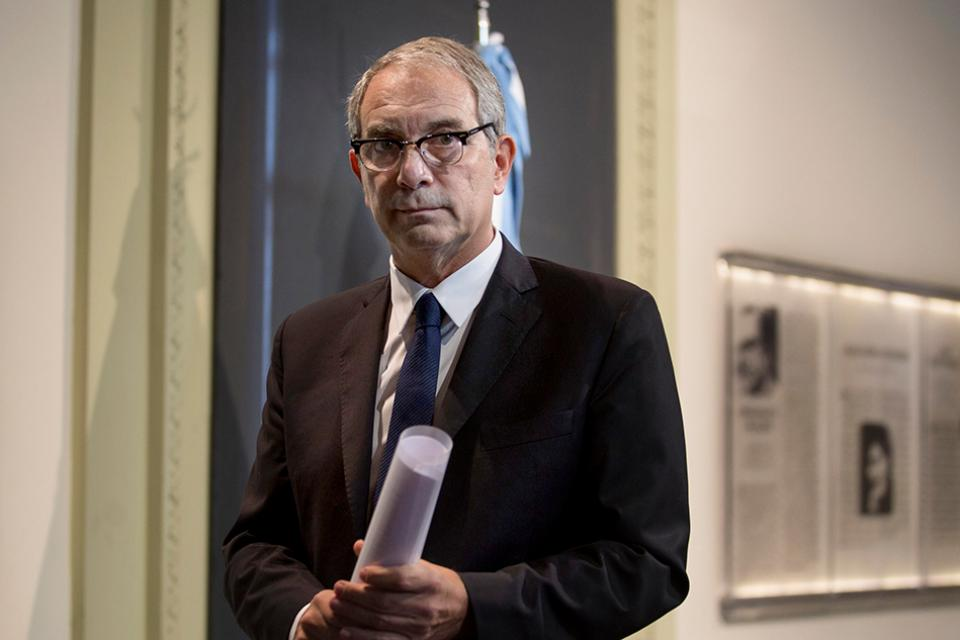

In [225]:
Image(img_req.content)

In [226]:
def _titulo(nota_s, url):
    """Extrae el título del artículo
    ENTRADA
            (BeautifulSoup) nota_s, de la página web
            (str) url, url de la página web
            
    SALIDA
            (str) return titulo.text """
    
    
  
    
    titulo = s_nota.find('h1', attrs = {'class':'article-title'})
    if titulo:
        
        return titulo.text
    else:
        
        return None
    


def _fecha(nota_s, url):
    """Extrae la fecha del artículo
    ENTRADA
            (BeautifulSoup) nota_s, de la página web
            (str) url, url de la página web
            
    SALIDA
            (str) return fecha """
    
   
    
    
    fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
    
    if fecha:
       
        return fecha
    else:
       
        return None

def _volanta(nota_s, url):
   
    
    volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
    
    if volanta:
        
        return volanta.text
    else:
       
        return None


def _autor(nota_s, url):
    """Extrae el autor del autor 
    ENTRADA
            (BeautifulSoup) nota_s, de la página web
            (str) url, url de la página web
            
    SALIDA
            (str) return autor.text """
    
    print(f'extrayendo el autor de {url}')
    
    autor = s_nota.find('div', attrs={'class':'article-author'}).a
    
    if autor:
        
        return autor.text
    else:
        
        return None
    
    
def _copete(nota_s, url):
    """Extrae el copete del autor 
    ENTRADA
            (BeautifulSoup) nota_s, de la página web
            (str) url, url de la página web
            
    SALIDA
            (str) return copete.text """
    
    
   
    
    copete = s_nota.find('div', attrs={'class': 'article-summary'})
    
    if copete:
        
        return copete.text
    else:
       
        return None
    
    
def _texto_articulo(nota_s, url):
    """Extrae el texto del artículo 
    ENTRADA
            (BeautifulSoup) nota_s, de la página web
            (str) url, url de la página web
            
    SALIDA
            (str) return articulo_texto """
    
    
    
    texto = s_nota.find('div', attrs={'class':'article-text'}).find_all('p')
    if texto :
        
        
        articulo_texto = ''
        for pedazo_texto in texto:
            articulo_texto += pedazo_texto.text
            
        return articulo_texto #str
    
    else: 
        
        return None
    

def _imagen(nota_s, url):
    """Extrae la imagen del artículo 
    ENTRADA
            (BeautifulSoup) nota_s, de la página web
            (str) url, url de la página web
            
    SALIDA
            (bytes) imagen_req.content """
    
   
    
    media = s_nota.find('div', attrs={'class' : 'article-main-media-image'})
    if media:
        imagenes = media.find_all('img')
    
        if len(imagenes) == 0:
        
            
            return None
        
        else :
            
            imagen = imagenes[-1]
            img_src = imagen.get('data-src')
            
            try:
                imagen_req = requests.get(img_src)
                if imagen_req:
                    return imagen_req.content # pixeles de la imagen
                
                else:
                    return None
                    
                
            except:
                
                return None
    else:
       
        return None
                

def scraper_articulo(nota_s ,url):
    """Escrapea la pagina web PG12,
    ENTRADA:
            (str) url, la url de la página web
            (BeautfiulSoup) nota_s
    SALIDA
            (dict) cosas, los valores son lo que componen la página y los items son los componentes extraidos"""
    
    cosas = {}
    
    #exctraemos las cosas
    

    titulo = _titulo(nota_s, url)
    cosas['titulo'] = titulo
    
    fecha = _fecha(nota_s, url)
    cosas['fecha'] = fecha
    
    volanta = _volanta(nota_s, url)
    cosas['volanta'] = volanta
    
    copete = _copete(nota_s, url)
    cosas['copete'] = copete
    
    autor = _autor(nota_s, url)
    cosas['autor'] = autor
    
    texto_articulo=_texto_articulo(nota_s, url)
    cosas['aticulo'] = texto_articulo
    
    imagen = _imagen(nota_s, url)
    cosas['imagen'] = imagen

    return cosas




def lector_imagen(imagen_pixel):
    """Leé las imagenes"""
    if len(imagen_pixel) == 0:
        print(f'no existe')
        
    else:
        return Image(imagen_pixel)
    

In [227]:
def scrape_nota(url):
    """Lee la pagina web y mira si el servidor responde
    
    ENTRADA
            (str) url, la url de la página web
            
    SALIDA
          RETURN  (BeautifulSoup) nota_s, ó 
          
          
            """
    try:
        nota = requests.get(url)
    except Exceptions as e:
        print('No se pudo scrapear la nota')
        print(e)
        return None
    
    if nota.status_code == 200:
        
        nota.enconding ='UTF-8'
        print('Sea entrado a la página')
        nota_s = BeautifulSoup(nota.text, 'lxml')
        ret_dict = scraper_articulo(nota_s, url)
        ret_dict['url'] = url
        
        return ret_dict
       
    
    else:
        print(f'Error obteniendo nota en {url}')
        print(f'Status code= {nota.status_code}')
        return None


In [228]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/psicologia',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [229]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'lxml')
            notas.extend(get_to_link(soup))
        else:
            print(f'No se pudo obtener la sección {link}, error tipo 2')
    except:
        print(f'No se pudo obtener la sección {link}, error tipo 1')
                
            
    

No se pudo obtener la sección https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos, error tipo 1


In [230]:
s =enumerate(notas)
s?

In [231]:
data = []
for i, nota in enumerate(notas):
    print(f'Scrapeando nota {i+1}/{len(notas)}')
    data.append(scrape_nota(nota))
    print('*'*50)
          

Scrapeando nota 0/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/263023-lo-define-la-justicia
**************************************************
Scrapeando nota 1/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262949-no-dejaremos-a-ningun-argentino-desamparado
**************************************************
Scrapeando nota 2/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262950-detencion-confirmada-para-cinco-represores
**************************************************
Scrapeando nota 3/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262966-el-gobierno-le-pidio-la-renuncia-al-titular-de-la-anses-alej
**************************************************
Scrapeando nota 4/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262967-queda-claro-que-la-vida-es-lo-unico-que-vale
**************************************************
Scrapeando

Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262888-cientificas-argentinas-identificaron-la-secuencia-genetica-d
**************************************************
Scrapeando nota 41/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262852-los-diferentes-tipos-de-tests-para-el-coronavirus-ventajas-y
**************************************************
Scrapeando nota 42/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262850-el-virus-comunista-y-el-plan-de-bill-gates-para-controlar-el
**************************************************
Scrapeando nota 43/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262842-violencia-de-genero-prohibicion-de-acercamiento-y-exclusion-
**************************************************
Scrapeando nota 44/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/262831-como-ver-el-asteroide-que-pasa-cerca-de-la-tierra-

**************************************************
Scrapeando nota 80/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/259971-de-que-nos-separa-el-aislamiento
**************************************************
Scrapeando nota 81/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/259994-salud-mental-en-tiempos-de-pandemia
**************************************************
Scrapeando nota 82/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/257489-el-psicoanalisis-que-intentamos-hoy-empujados-hacia-internet
**************************************************
Scrapeando nota 83/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/258459-coronavirus-y-transferencia
**************************************************
Scrapeando nota 84/105
Sea entrado a la página
extrayendo el autor de https://www.pagina12.com.ar/256882-transferencia-y-poder-la-cara-social-de-la-angustia
**********

In [237]:
df = pd. DataFrame(data)
df.head()

,titulo,fecha,volanta,copete,autor,aticulo,imagen,url
0,Lo define la justicia,2020-04-30,Julio Alak y las excarcelaciones,None,Horacio Bernades,En el marco del debate en torno a las excarcel...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://www.pagina12.com.ar/263023-lo-define-l...
1,Lo define la justicia,2020-04-30,Julio Alak y las excarcelaciones,None,Horacio Bernades,En el marco del debate en torno a las excarcel...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://www.pagina12.com.ar/262949-no-dejaremo...
2,Lo define la justicia,2020-04-30,Julio Alak y las excarcelaciones,None,Horacio Bernades,En el marco del debate en torno a las excarcel...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://www.pagina12.com.ar/262950-detencion-c...
3,Lo define la justicia,2020-04-30,Julio Alak y las excarcelaciones,None,Horacio Bernades,En el marco del debate en torno a las excarcel...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://www.pagina12.com.ar/262966-el-gobierno...
4,Lo define la justicia,2020-04-30,Julio Alak y las excarcelaciones,None,Horacio Bernades,En el marco del debate en torno a las excarcel...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://www.pagina12.com.ar/262967-queda-claro...


In [238]:
df.to_csv('notas_paginas.csv')